### 1. Data Loading

In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings

In [269]:
# Ignore warnings in the notebook
warnings.filterwarnings('ignore')

In [270]:
df = pd.read_csv("data/heart_disease_uci.csv")

### 2. EDA

In [271]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [272]:
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [273]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [275]:
df.shape

(920, 16)

In [276]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [277]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [278]:
df.duplicated().sum()

np.int64(0)

In [279]:
df.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [280]:
# Target variable distribution - Class imbalance check 
df['num'].value_counts(normalize=True)

num
0    0.446739
1    0.288043
2    0.118478
3    0.116304
4    0.030435
Name: proportion, dtype: float64

In [281]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [282]:
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

categorical_cols,numerical_cols

(Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object'),
 Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object'))

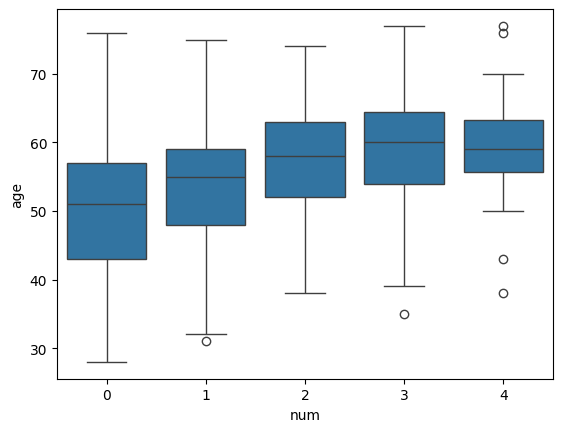

In [283]:
sns.boxplot(x='num', y='age', data=df)
plt.show()

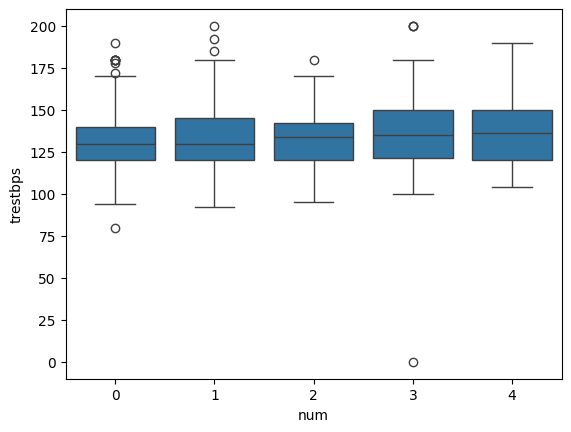

In [284]:
sns.boxplot(x='num', y='trestbps', data=df)
plt.show()

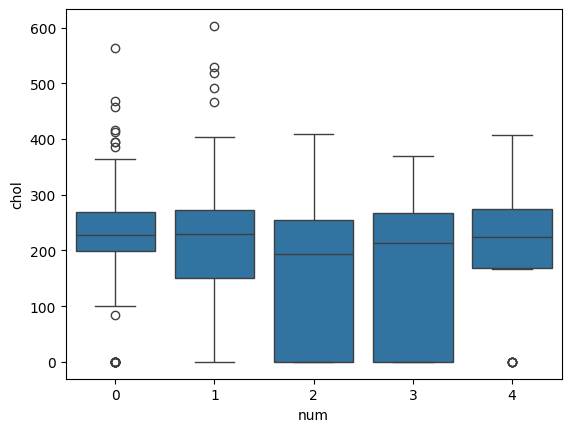

In [285]:
sns.boxplot(x='num', y='chol', data=df)
plt.show()

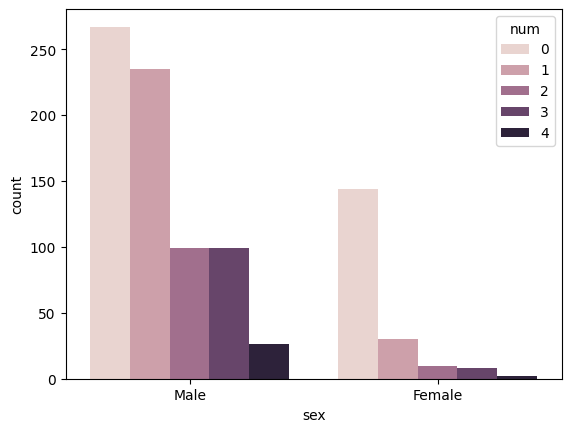

In [286]:
sns.countplot(x='sex', hue='num', data=df)
plt.show()

In [287]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

### 3. Data Preprocessing

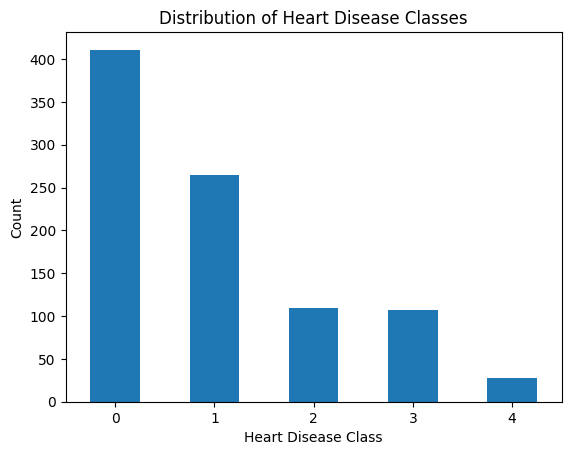

In [288]:
# Target variable is multiclass classsification problem.
# Class 0: No heart disease, Class 1: Mild heart disease, Class 2: Moderate heart disease
# Class 3: Severe heart disease, Class 4: Critical heart disease
df['num'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Heart Disease Class')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease Classes')
plt.xticks(rotation=0)
plt.show()

In [289]:
X = df.drop('num', axis=1)
y = df['num']

In [290]:
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=['int64','float64']).columns

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')
Numerical columns: Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca'], dtype='object')


In [291]:
# Dropping 'id' , 'dataset' columns as they are not useful for prediction
# Also, 'id' is a unique identifier and 'dataset' is just an indicator of the source of the data.
# These columns do not provide any meaningful information for the model to learn from and may introduce noise.
X = X.drop(['id', 'dataset'], axis=1)
print("Dropped 'id' and 'dataset' columns. /nRemaining columns:", X.columns)

Dropped 'id' and 'dataset' columns. /nRemaining columns: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [292]:
# Using ColumnTransformer for Categorical columns Encoding
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=['int64','float64']).columns

In [293]:
# Handling NaN values
# Check for NaNs
display(X.isnull().sum())

# Fill NaNs (imputation)
# For numerical columns, filling with median; for categorical, filling with mode
for col in X.columns:
    if X[col].dtype in ['float64', 'int64']:
        X[col].fillna(X[col].median(), inplace=True)
    else:
        X[col].fillna(X[col].mode()[0], inplace=True)

# After imputation, check for NaNs again to confirm all missing values are handled
display(X.isnull().sum())

# Handling outliers (using IQR method for numerical columns)
for col in numerical_cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # Option 1: Remove outliers
    # X = X[(X[col] >= lower) & (X[col] <= upper)]
    # Option 2: Cap outliers (uncomment below if you prefer capping)
    X[col] = np.where(X[col] < lower, lower, np.where(X[col] > upper, upper, X[col]))

display(X.describe())

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
dtype: int64

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

,age,trestbps,chol,thalch,oldpeak,ca
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.0
mean,53.510870,131.725000,207.095516,137.702174,0.843696,0.0
std,9.424685,16.921872,91.530131,25.116321,1.022640,0.0
min,28.000000,90.000000,43.875000,66.000000,-2.250000,0.0
25%,47.000000,120.000000,177.750000,120.000000,0.000000,0.0
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.0
75%,60.000000,140.000000,267.000000,156.000000,1.500000,0.0
max,77.000000,170.000000,400.875000,202.000000,3.750000,0.0


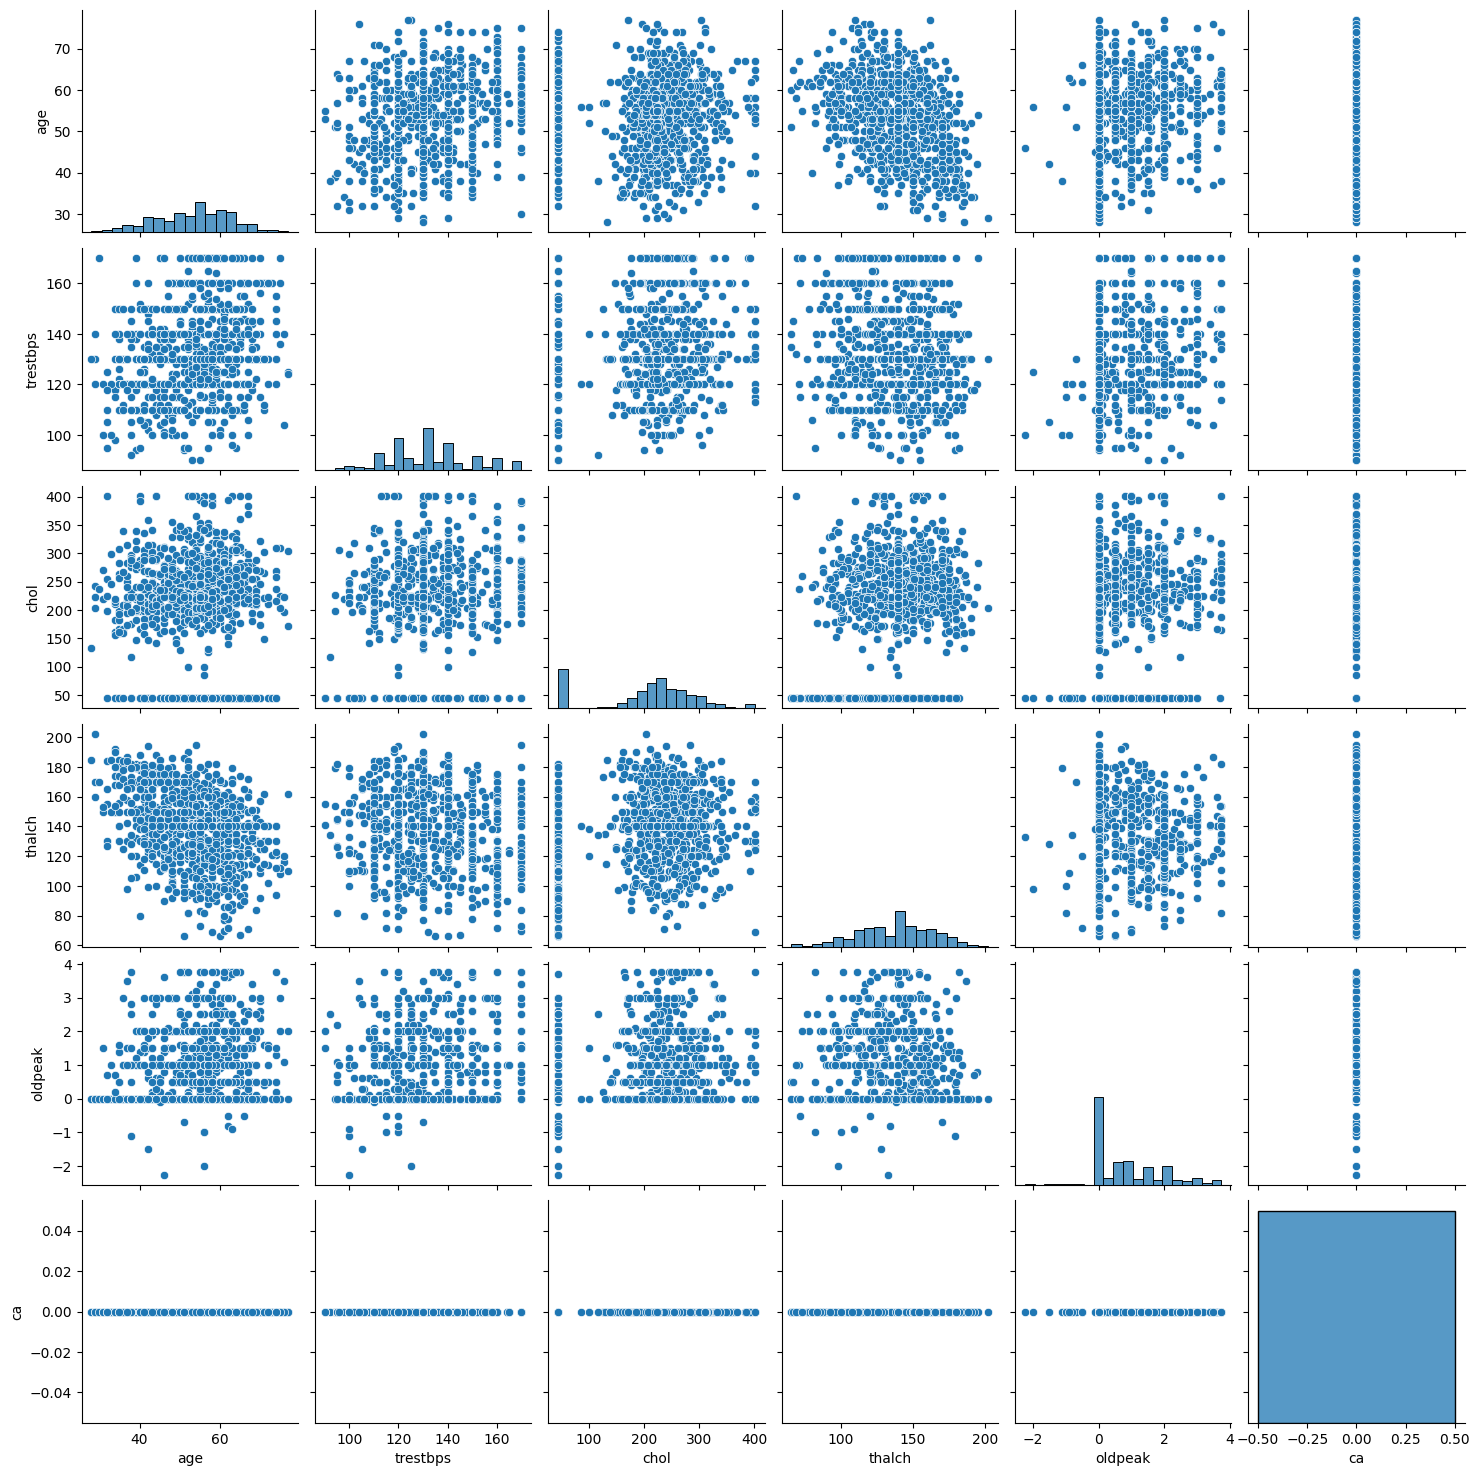

In [266]:
sns.pairplot(X[numerical_cols])
plt.show()

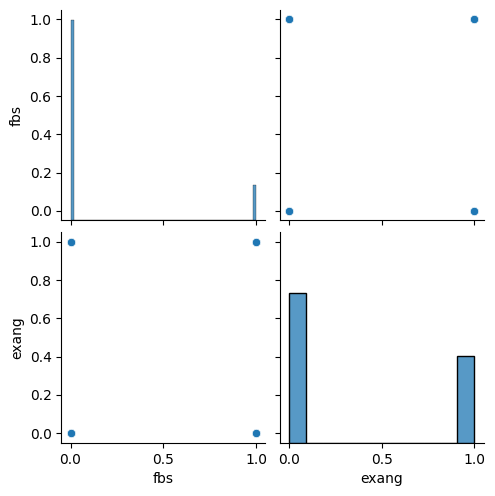

In [294]:
sns.pairplot(X[categorical_cols])
plt.show()

In [295]:
# Pipeline for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]) 

In [297]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [300]:
# Fit the preprocessor on the training data and transform both training and test data 
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [301]:
X_train.shape

(736, 18)

### 4. Model Building

In [305]:
# Common metrics calculation 
def calculate_metrics(y_true, y_pred, y_prob=None):
    # Accuracy
    accuracy = np.sum(y_true == y_pred) / len(y_true)

    # Precision, Recall, F1 (macro average for multiclass)
    classes = np.unique(y_true)
    precisions, recalls, f1s = [], [], []
    for cls in classes:
        tp = np.sum((y_pred == cls) & (y_true == cls))
        fp = np.sum((y_pred == cls) & (y_true != cls))
        fn = np.sum((y_pred != cls) & (y_true == cls))
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)
    precision_macro = np.mean(precisions)
    recall_macro = np.mean(recalls)
    f1_macro = np.mean(f1s)

    # MCC (Matthews Correlation Coefficient)
    if len(classes) == 2:
        tp = np.sum((y_pred == 1) & (y_true == 1))
        tn = np.sum((y_pred == 0) & (y_true == 0))
        fp = np.sum((y_pred == 1) & (y_true == 0))
        fn = np.sum((y_pred == 0) & (y_true == 1))
        mcc_num = (tp * tn) - (fp * fn)
        mcc_den = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
        mcc = mcc_num / mcc_den if mcc_den > 0 else 0
    else:
        mcc = 'MCC for multiclass not implemented'

    # AUC Score (only for binary, using y_prob)
    auc = None
    if y_prob is not None and len(classes) == 2:
        # Sort by predicted probability for class 1
        order = np.argsort(-y_prob)
        y_true_sorted = y_true[order]
        y_prob_sorted = y_prob[order]
        pos = np.sum(y_true_sorted == 1)
        neg = np.sum(y_true_sorted == 0)
        rank_sum = np.sum(np.where(y_true_sorted == 1)[0] + 1)
        auc = (rank_sum - pos * (pos + 1) / 2) / (pos * neg) if pos > 0 and neg > 0 else 0

    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC Score: {auc if auc is not None else 'N/A'}")
    print(f"Precision (macro): {precision_macro:.4f}")
    print(f"Recall (macro): {recall_macro:.4f}")
    print(f"F1 Score (macro): {f1_macro:.4f}")
    print(f"MCC Score: {mcc}")

# Example usage:
# calculate_metrics(y_test, y_pred, y_prob)


In [ ]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create pipeline with preprocessor and logistic regression
logreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Fit the pipeline on training data
logreg_pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = logreg_pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))